# <span>Exploratory Data Analysis </span>

### Question for Analysis.
Do variables like gender, having multiple lines, streaming TV, and having device protection have an impact on turnover, allowing us to better analyze the behavior of customers and minimize turnover over time?

### Benefit for Analysis.
Organizational stakeholders will benefit from knowing, with some degree of certainity, which consumers are more likely to churn and which aren't.
On this sample dataset, the Chi-Square test will be used to answer the analytical questions. If a customer has numerous lines, streams TV, and has device protection, for example, the corporation might look into which service features the customer values the most. As a result of statistical analysis, stakeholders will have their questions answered and will be able to make better business decisions.

### Data Identification.
We'll examine a subset of the population dataset, utilizing a sample size of first 100 data points out of 10,000. The dependent variable "Churn," which is binary categorical with only two values, "Yes" or "No," will be most significant to our judgment process. Variables such as "Gender", "Multiple", "Device Protection" and "Streaming TV" will be analyzed to see if these features are dependant on "Churn" or not.

According to the data dictionary given by WGU, "Gender" refers to a customer's gender. Each customer can self-identify themselves as male, female, or nonbinary. "Device Protection" represents whether the customer has a device protection add-on (yes/no). "Streaming TV" represents whether the customer has streaming TV (yes/no) and "Multiple" represents whether the customer has multiple lines (yes/no).

### Code.
The data set will be analyzed using the Chi-square test approach. Code is written in Python. Code is listed below

### Outputs and Results


In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statistics
from scipy import stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv("churn_clean.csv", usecols = ['Churn', 'Gender', 'Multiple', 
'StreamingTV', 'DeviceProtection']) #df is set to read the clean dataset. Only variables that need to be analyzed are called upon. 

In [ ]:
def describe(df):
  output_df = pd.DataFrame(columns= ['Count', 'Missing', 'Unique', 'Numeric', 'Dtype',
   'Mode'])
  for col in df: 
    if pd.api.types.is_numeric_dtype(df[col]):
      output_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(), pd.api.types.is_numeric_dtype(df[col]),df[col].dtype, df[col].mode().values[0]]
    else:
      output_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(), pd.api.types.is_numeric_dtype(df[col]), df[col].dtype, df[col].mode().values[0]]
  return output_df
#Test the function  
describe(df)

In [ ]:
contingency = pd.crosstab(df['Churn'], df['Gender'])
contingency

In [ ]:
contingency_pct = pd.crosstab(df['Churn'], df['Gender'],normalize='index')
contingency_pct

<AxesSubplot:xlabel='Gender', ylabel='Churn'>

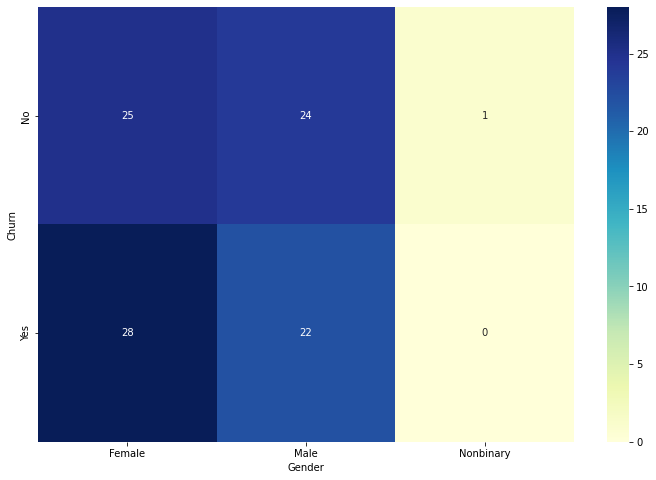

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(contingency, annot=True, cmap="YlGnBu")

In [10]:
c, p, dof, expected = chi2_contingency(contingency)
alpha = 0.05
print('p-value = ' + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independant (H0 holds true)')


p-value = 0.5334532071631821
Independant (H0 holds true)


In [11]:
contingency = pd.crosstab(df['Churn'], df['Multiple'])
contingency

Multiple,No,Yes
Churn,,
No,35,15
Yes,24,26


In [12]:
contingency_pct = pd.crosstab(df['Churn'], df['Multiple'],normalize='index')
contingency_pct

Multiple,No,Yes
Churn,,
No,0.70,0.30
Yes,0.48,0.52


<AxesSubplot:xlabel='Multiple', ylabel='Churn'>

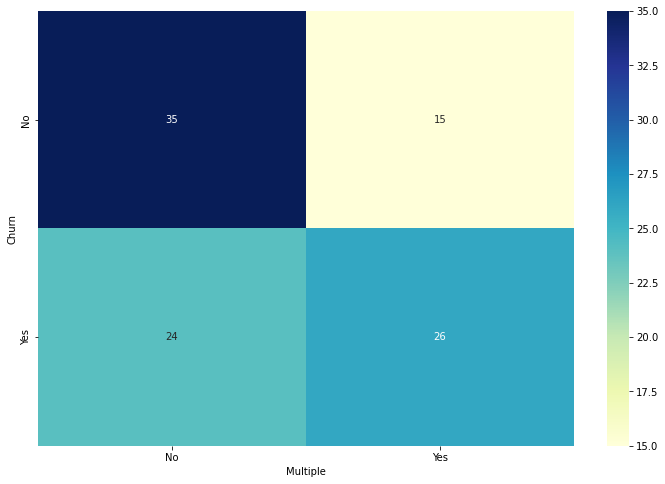

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(contingency, annot=True, cmap="YlGnBu")

In [14]:
c, p, dof, expected = chi2_contingency(contingency)
alpha = 0.05
print('p-value = ' + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independant (H0 holds true)')

p-value = 0.04203139214067035
Dependent (reject H0)


In [15]:
contingency = pd.crosstab(df['Churn'], df['DeviceProtection'])
contingency

DeviceProtection,No,Yes
Churn,,
No,25,25
Yes,25,25


In [16]:
contingency_pct = pd.crosstab(df['Churn'], df['DeviceProtection'],normalize='index')
contingency_pct

DeviceProtection,No,Yes
Churn,,
No,0.5,0.5
Yes,0.5,0.5


In [18]:
c, p, dof, expected = chi2_contingency(contingency)
alpha = 0.05
print('p-value = ' + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independant (H0 holds true)')

p-value = 1.0
Independant (H0 holds true)


<AxesSubplot:xlabel='DeviceProtection', ylabel='Churn'>

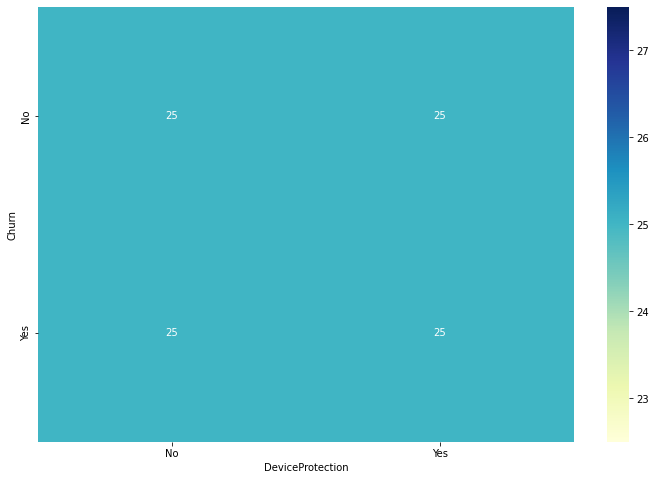

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(contingency, annot=True, cmap="YlGnBu")

In [20]:
contingency = pd.crosstab(df['Churn'], df['StreamingTV'])
contingency

StreamingTV,No,Yes
Churn,,
No,33,17
Yes,16,34


In [21]:
contingency_pct = pd.crosstab(df['Churn'], df['StreamingTV'],normalize='index')
contingency_pct

StreamingTV,No,Yes
Churn,,
No,0.66,0.34
Yes,0.32,0.68


p-value = 0.0013712264519607198
Dependent (reject H0)


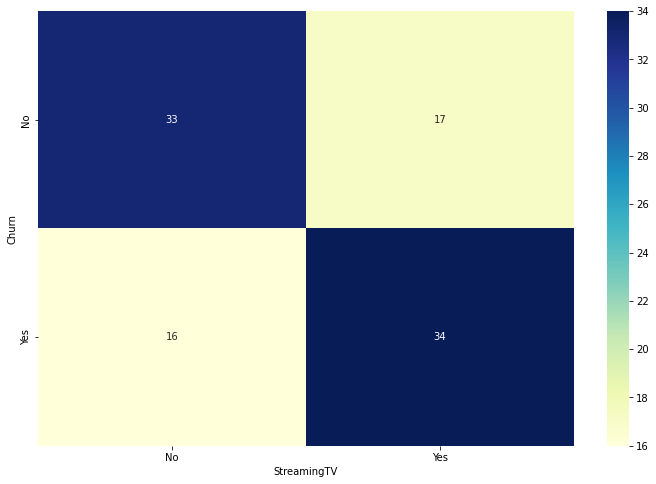

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(contingency, annot=True, cmap="YlGnBu")

c, p, dof, expected = chi2_contingency(contingency)
alpha = 0.05
print('p-value = ' + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independant (H0 holds true)')

### Justification of Chi-Square Analysis Technique

There must be two variables in a chi square test, both of which are assessed as categories, usually at the nominal level.
In the analysis listed above, all variables were categorical and the target output variable (churn) is binomial (yes/no) and categorical. 
Due to these factors, a non-parametric test must be used. To establish whether the output variable (churn) is dependent or independent of the input factors, the Chi Square test was performed. 
"Gender", "Multiple", "StreamingTV", and "DeviceProtection" are the input variables that are being examined. If the outcome and input variables are found to be independent of one 
another, the input variables may be irrelevant to the issue being posed.

### Univariate Statistics.

**Continuous**
1. MontlyCharge
2. Bandwidth_GB_Year

**Categorical**
1. Item1 – Timely Response
2. Item8 – Evidence of Active Listening


In [47]:
df = pd.read_csv('churn_clean.csv', usecols = ['MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item8'])
df.rename(columns = {'Item1':'Timely Response',
'Item8':'Evidence of active listening'},
inplace=True) #rename columns from item1 to item8 according to the data dictionary. 
df.describe()

,MonthlyCharge,Bandwidth_GB_Year,Timely Response,Evidence of active listening
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,172.624816,3392.341550,3.490800,3.495600
std,42.943094,2185.294852,1.037797,1.028633
min,79.978860,155.506715,1.000000,1.000000
25%,139.979239,1236.470827,3.000000,3.000000
50%,167.484700,3279.536903,3.000000,3.000000
75%,200.734725,5586.141370,4.000000,4.000000
max,290.160419,7158.981530,7.000000,8.000000


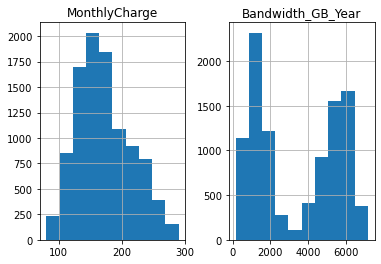

In [32]:
data = pd.read_csv('churn_clean.csv', usecols = ['MonthlyCharge', 'Bandwidth_GB_Year'])
hist1 = data.hist()

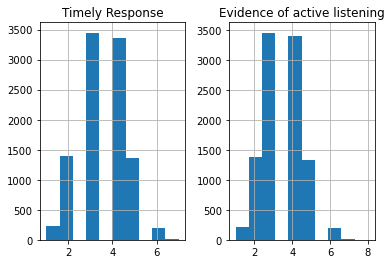

In [35]:
data1 = pd.read_csv('churn_clean.csv', usecols = ['Item1', 'Item8'])
data1.rename(columns = {'Item1':'Timely Response',
'Item8':'Evidence of active listening'}, inplace = True)
hist2 = data1.hist()

<AxesSubplot:xlabel='MonthlyCharge'>

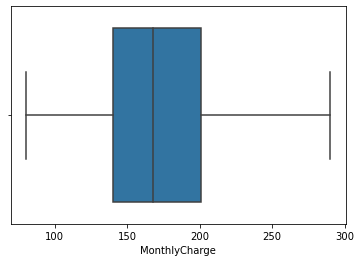

In [37]:
sns.boxplot(x=df['MonthlyCharge'])

<AxesSubplot:xlabel='Bandwidth_GB_Year'>

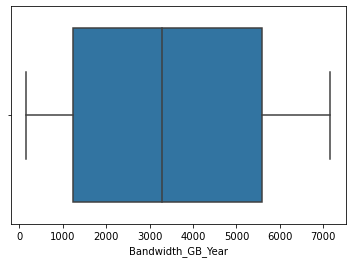

In [39]:
sns.boxplot(x=df['Bandwidth_GB_Year'])

<AxesSubplot:xlabel='Timely Response'>

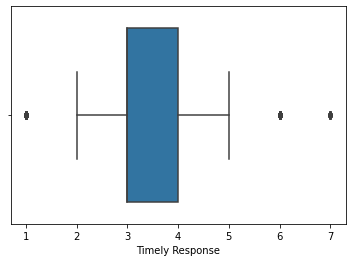

In [41]:
sns.boxplot(x=df['Timely Response'])


<AxesSubplot:xlabel='Evidence of active listening'>

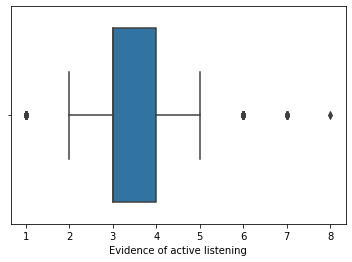

In [42]:
sns.boxplot(x=df['Evidence of active listening'])


### Bivariate Statistics

**Continuous**
1. MontlyCharge
2. Bandwidth_GB_Year

**Categorical**
1. Item1 – Timely Response
2. Item8 – Evidence of Active Listening

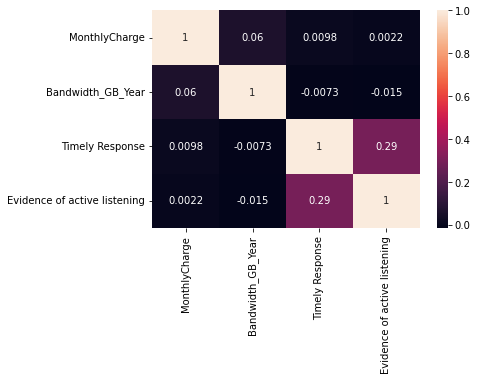

In [43]:
sns.heatmap(df.corr(), annot=True)
plt.show()


<AxesSubplot:xlabel='Timely Response', ylabel='Evidence of active listening'>

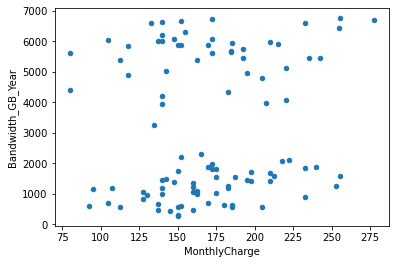

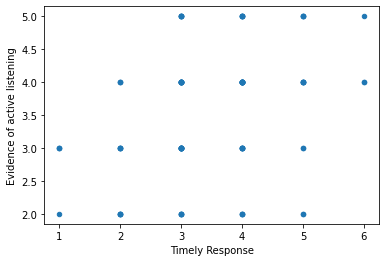

In [45]:
# scatter plot of continuous variables 
df[df['MonthlyCharge'] < 300].sample(100).plot.scatter(x='MonthlyCharge', y='Bandwidth_GB_Year')
# scatter plot of categorical variables
df[df['Timely Response'] < 7].sample(100).plot.scatter(x='Timely Response', y='Evidence of active listening')

<AxesSubplot:xlabel='MonthlyCharge', ylabel='Bandwidth_GB_Year'>

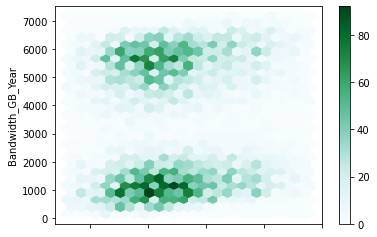

In [46]:
df[df['MonthlyCharge'] < 300].plot.hexbin(x='MonthlyCharge', y='Bandwidth_GB_Year', gridsize=25)


### Analysis of the Results
We used the Chi Square test, as mentioned above. "Multiple", "StreamingTV", "Gender", and "DeviceProtection" were the four independent input factors. We needed to confirm that these input variables were dependent on the output target variable (churn). The Chi Square test works like this: If the p value is greater than the alpha value, we fail to reject the null hypothesis. If the p value is less than the alpha value, we reject the null hypothesis. 
The following were the Chi Square test hypotheses:
If the null hypothesis (H0) holds true, then an input variable is unrelated to the output variable (independent).
If the null hypothesis is rejected, then the alternative hypothesis (Ha) tells us that the two variables are dependent on each other. 

1. "Gender"
P-value = 0.533
Null Hypothesis holds true (Independent from Churn)

2. "Multiple"
P-value = 0.042
Dependent on Churn (reject H0)

3. "DeviceProtection"
P-value = 1.0
Null Hypothesis holds true (Independent from Churn)

4. "StreamingTV"
P-value = 0.0014
Dependent on Churn (reject H0)

From the results above, we can assume with 95% confidence that churn is independent from "Gender" and "DeviceProtection". Churn, however, seems to be dependent on "Multiple" and "StreamingTV".

Bivariate statistics compares two variables. From the scatter plot above, "MonthlyCharge" and "Bandwidth_GB_Year" have no relationship with each other. The same also goes for the two categorical variables that are being compared. There seems to be no correlation with "Timely Response" vs. "Evidence of Active Listening"

### Limitations
As previously stated, the sample dataset for this Chi-Square test is not truly random, but rather the first 100 data points. Not completely randomizing the sample dataset from the population dataset could be deceptive. I anticipated detecting a distinct association between the categorical variables using a scatter plot. However, it does not appear that there were any. It could be the result of data entering errors.

### Recommendations
As previously stated, customer churn is unaffected by the variables "Gender" and "DeviceProtection." As a result, before going on to the next phase of the data analysis cycle, the "Gender" and "DeviceProtection" variables can be eliminated and discarded from the dataset (if needed). With 95% confidence, I recommend looking deeper into the correlation and determinants for the remaining two variables that influence turnover rate ("StreamingTV," "Multiple"), since this inquiry could significantly improve the company's business and income.

### Sources for the third party code
1. YouTube. (n.d.). Learn exploratory data Analysis (EDA) in Python. YouTube. Retrieved September 15, 2021, from https://www.youtube.com/playlist?list=PLe9UEU4oeAuV7RtCbL76hca5ELO_IELk4. 
2. Python: Univariate statistics. YouTube. (2020, February 20). Retrieved September 15, 2021, from https://youtu.be/78ut-S-QOEQ. 
3. Dataframe¶. DataFrame - pandas 1.3.3 documentation. (n.d.). Retrieved September 15, 2021, from https://pandas.pydata.org/docs/reference/frame.html. 

### Sources
1. Stephanie. (2021, July 17). Bivariate analysis Definition &amp; Example. Statistics How To. Retrieved September 15, 2021, from https://www.statisticshowto.com/bivariate-analysis/.
2. Myatt, Glenn & Johnson, Wayne. (2014). Making Sense of Data I: A Practical Guide to Exploratory Data Analysis and Data Mining, Second Edition. 10.1002/9781118422007.
3. Dataframe¶. DataFrame - pandas 1.3.3 documentation. (n.d.). Retrieved September 15, 2021, from https://pandas.pydata.org/docs/reference/frame.html. 